# Player Comparison

Create a model that can find similar players from athlete totals.

In [1]:
import os, warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
warnings.filterwarnings("ignore")

In [2]:
path = os.path.join(os.path.dirname(os.getcwd()), "data", "nba_player_stats_2023.csv")
df = pd.read_csv(path)
df.columns = df.columns.str.lower()
df.set_index("pname", inplace=True)
df.head()

,pos,team,age,gp,w,l,min,pts,fgm,fga,...,reb,ast,tov,stl,blk,pf,fp,dd2,td3,+/-
pname,,,,,,,,,,,,,,,,,,,,,
Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,1559,...,649,342,213,78,51,160,3691,31,1,470
Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,1328,...,670,274,226,66,112,205,3706,39,1,424
Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,1449,...,569,529,236,90,33,166,3747,36,10,128
Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,1381,...,329,371,192,112,65,192,3425,3,0,149
Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,1278,...,742,359,246,52,51,197,3451,46,6,341


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539 entries, Jayson Tatum to Sterling Brown
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pos     534 non-null    object 
 1   team    539 non-null    object 
 2   age     539 non-null    int64  
 3   gp      539 non-null    int64  
 4   w       539 non-null    int64  
 5   l       539 non-null    int64  
 6   min     539 non-null    float64
 7   pts     539 non-null    int64  
 8   fgm     539 non-null    int64  
 9   fga     539 non-null    int64  
 10  fg%     539 non-null    float64
 11  3pm     539 non-null    int64  
 12  3pa     539 non-null    int64  
 13  3p%     539 non-null    float64
 14  ftm     539 non-null    int64  
 15  fta     539 non-null    int64  
 16  ft%     539 non-null    float64
 17  oreb    539 non-null    int64  
 18  dreb    539 non-null    int64  
 19  reb     539 non-null    int64  
 20  ast     539 non-null    int64  
 21  tov     539 non-null  

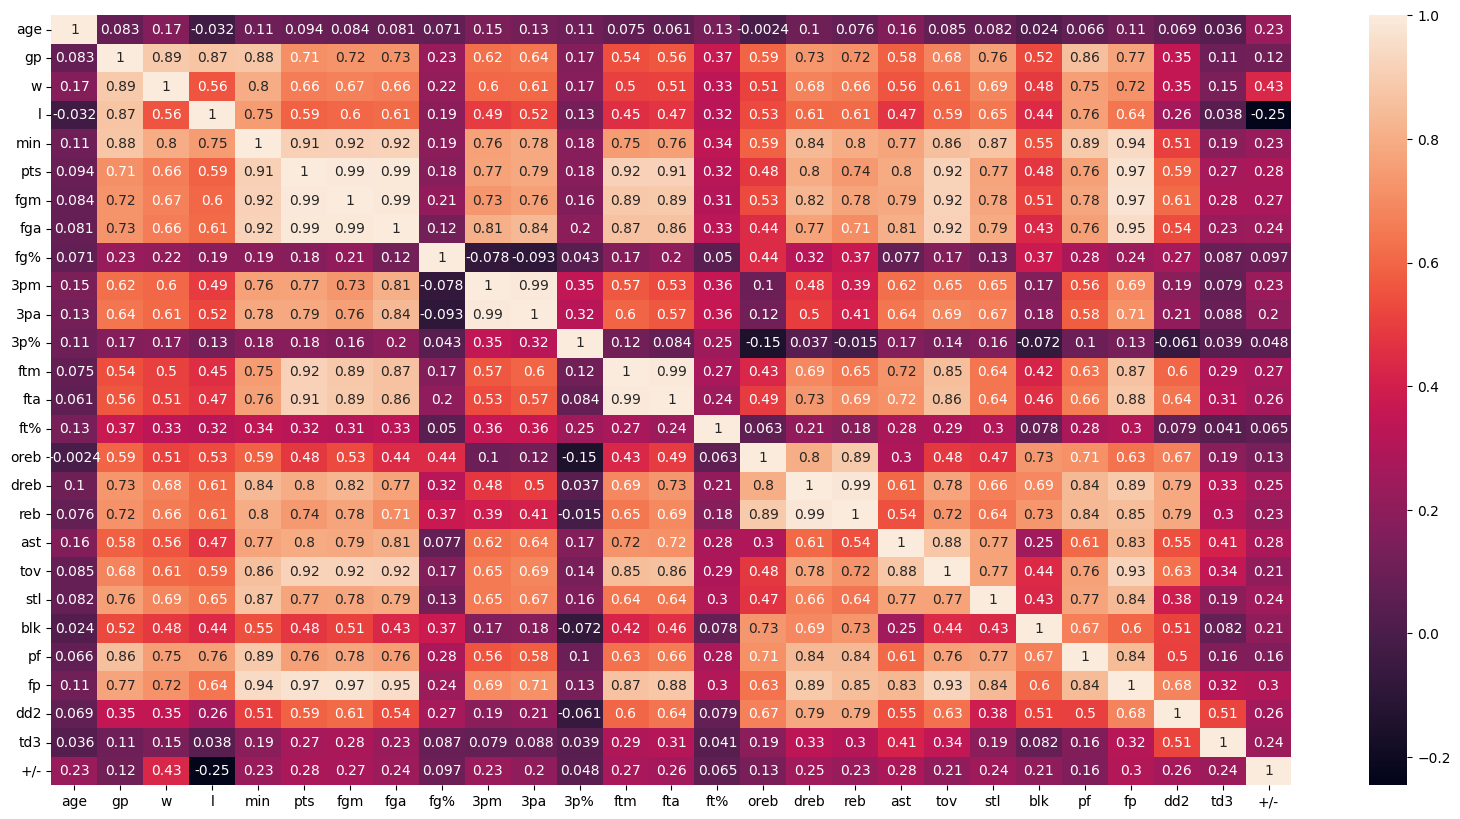

In [4]:
# Correlation
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True);

In [5]:
# Using few columns for simplicity
cols = ["min", "pts", "fgm", "fga", "3pm", "3pa", "ftm", "fta", "oreb", "dreb", "ast", "tov", "stl", "blk"]
subset_df = df[cols]
subset_df.head()

,min,pts,fgm,fga,3pm,3pa,ftm,fta,oreb,dreb,ast,tov,stl,blk
pname,,,,,,,,,,,,,,
Jayson Tatum,2732.2,2225,727,1559,240,686,531,622,78,571,342,213,78,51
Joel Embiid,2284.1,2183,728,1328,66,200,661,771,113,557,274,226,66,112
Luka Doncic,2390.5,2138,719,1449,185,541,515,694,54,515,529,236,90,33
Shai Gilgeous-Alexander,2416.0,2135,704,1381,58,168,669,739,59,270,371,192,112,65
Giannis Antetokounmpo,2023.6,1959,707,1278,47,171,498,772,137,605,359,246,52,51


In [6]:
# Scale the records
scaler = MinMaxScaler()
subset_df[cols] = scaler.fit_transform(subset_df)

In [7]:
# Understanding the cosine similarity algo
a = np.array(subset_df.loc[["Klay Thompson"]])[0]
b = np.array(subset_df.loc[["Mitchell Robinson"]])[0]
numerator = np.dot(a=a, b=b)
denominator = np.linalg.norm(a) * np.linalg.norm(b)
similar = numerator/denominator
similar

np.float64(0.47695770566564943)

In [8]:
# Calculating similarity for every record
samples = cosine_similarity(subset_df)
subset_df["pos"] = df["pos"]

In [9]:
def similar_players(name: str, limit: int) -> None:
    """
    Returns a given number of similar players by the name.

    Parameters:
        name (str): Name of the NBA player.
        limit (int): Number of players to print.

    Returns:
        None
    """
    count = 0
    for idx, similarities in enumerate(samples):
        if subset_df.iloc[idx].name == name:
            athlete_idxs = similarities.argsort()[::-1][1:]
            for athelete in athlete_idxs:
                if subset_df.iloc[athelete].pos == subset_df.iloc[idx].pos:
                    print(subset_df.iloc[athelete].name)
                    count += 1
                if count == limit:
                    return

In [10]:
similar_players("LeBron James", 10)

Khris Middleton
Brandon Ingram
Keldon Johnson
Kyle Kuzma
Franz Wagner
Jayson Tatum
Kawhi Leonard
Gordon Hayward
Bojan Bogdanovic
Mikal Bridges
